In [1]:
#some imports may not be used within notebook
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#load dataset
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dataframe SepalWidthCm greater than 4
SepalWidthCm_greater_than_4 = df.loc[df['SepalWidthCm'] > 4].reset_index()
SepalWidthCm_greater_than_4.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,15,16,5.7,4.4,1.5,0.4,Iris-setosa
1,32,33,5.2,4.1,1.5,0.1,Iris-setosa
2,33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [4]:
#dataframe PetalWidthCm greater than 1
PetalWidthCm_greater_than_1 = df.loc[df['PetalWidthCm'] > 1].reset_index()
PetalWidthCm_greater_than_1.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,50,51,7.0,3.2,4.7,1.4,Iris-versicolor
1,51,52,6.4,3.2,4.5,1.5,Iris-versicolor
2,52,53,6.9,3.1,4.9,1.5,Iris-versicolor
3,53,54,5.5,2.3,4.0,1.3,Iris-versicolor
4,54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [5]:
#return records of petalwidth greater than 1
df.loc[df['PetalWidthCm'] > 2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


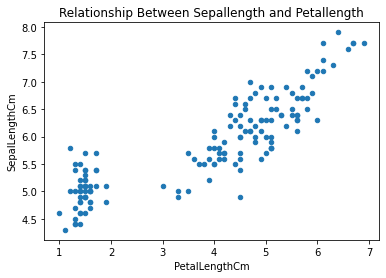

In [6]:
#show relationship between sepallength and petallength
x = df['PetalLengthCm']
y = df['SepalLengthCm']


plt.scatter(x, y, s=20)
plt.title("Relationship Between Sepallength and Petallength")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.show()

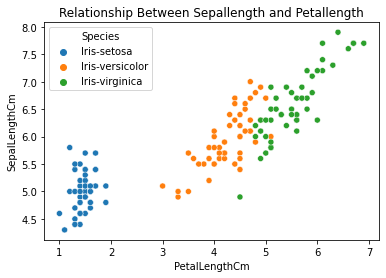

In [7]:
#applied species as hue in the same scatter plot for better visibility and understanding

hue = df['Species']
sns.scatterplot(data=df, x=x, y=y, hue=hue)
plt.title("Relationship Between Sepallength and Petallength")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.show()

KMEANS: Data Clustering

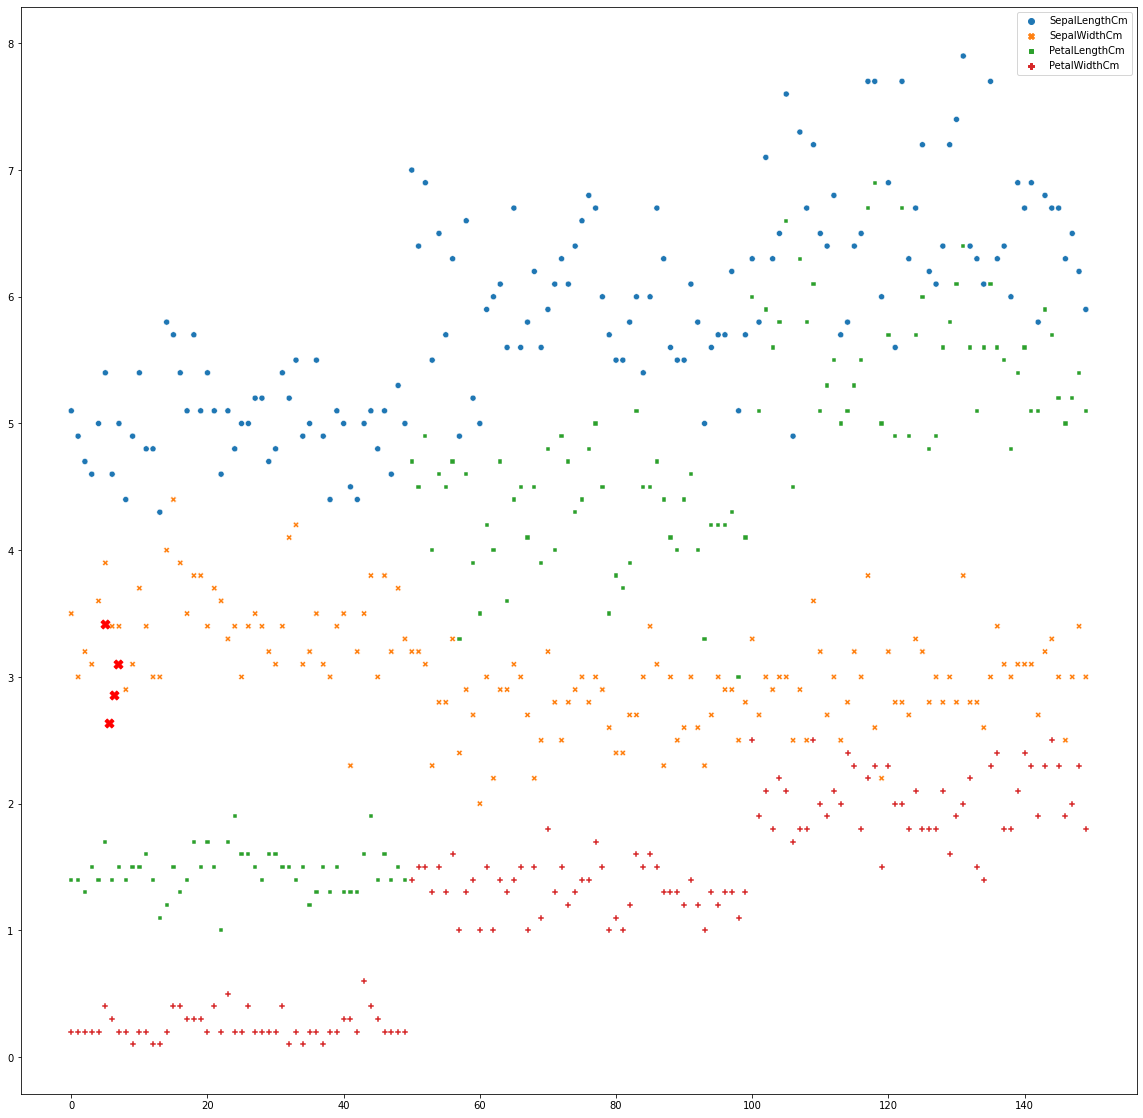

In [8]:
#drop non-numerical data columns
data = df.drop(['Species', 'Id'], axis=1)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data)

#set size of plot
plt.figure(figsize=(20,20))

sns.scatterplot(data=data)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80)
plt.legend()
plt.show()

Prediction: Linear Regression Model 1

In [9]:
#set up data and reshape
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
x = df['SepalWidthCm'].array.reshape(-1, 1)
y = df['SepalLengthCm'].array.reshape(-1, 1)

#split data in test(30%) and train(70) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#create linear regression object
regressor = LinearRegression()

# fit data and train model
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
#Predict x_test from predict method and store the result into y_pred obect
y_pred = regressor.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

0.6988211446970738

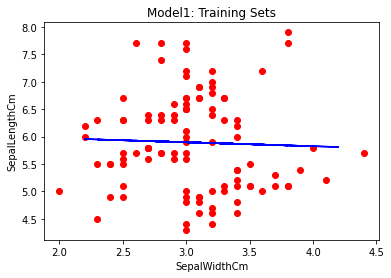

In [12]:
# Visualizing the training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Model1: Training Sets')
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

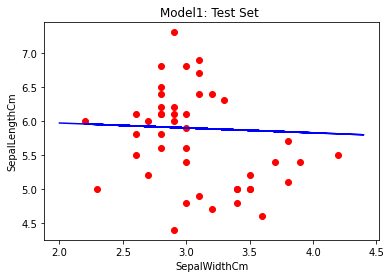

In [13]:
# Visualizing the test set 
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Model1: Test Set ')
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

Prediction: Linear Regression Model 2

In [14]:
#set up data and reshape 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
y = df['SepalLengthCm'].array.reshape(-1, 1)
x = df['PetalLengthCm'].array.reshape(-1, 1)


#split data in test(30%) and train(70) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#create linear regression object
regressor = LinearRegression()

# fit data and train model
regressor.fit(X_train, y_train)

#Predict x_test from predict method and store the result into y_pred obect
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=False)
mse

0.40416719236361653

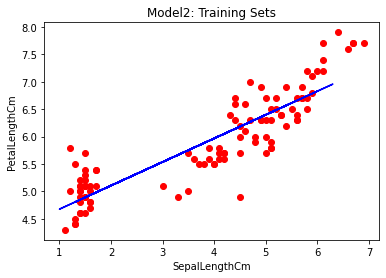

In [15]:
# Visualizing the training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Model2: Training Sets')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

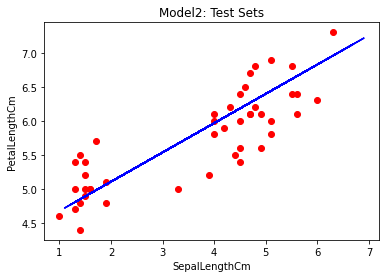

In [16]:
# Visualizing the test set 
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Model2: Test Sets')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

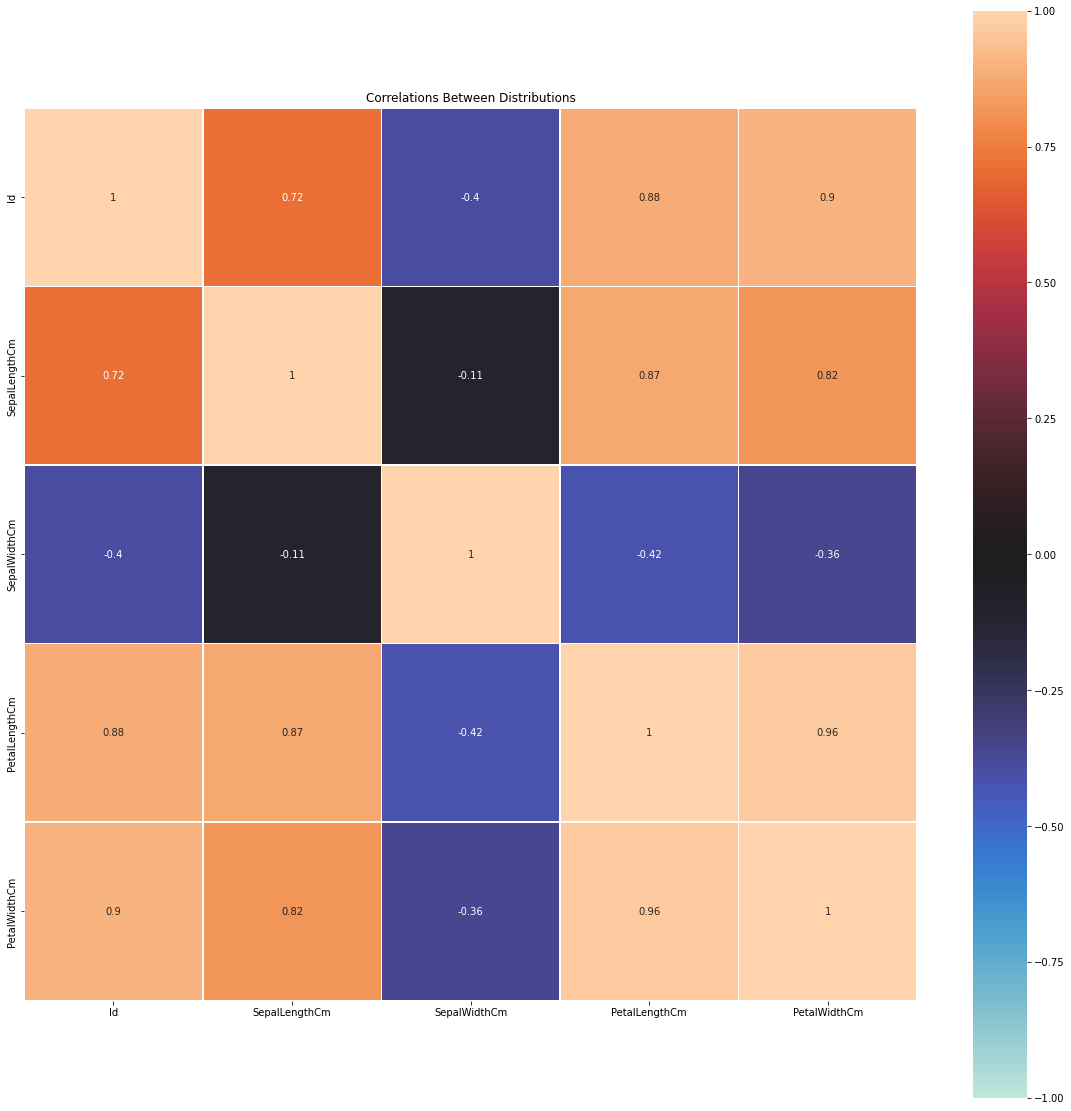

In [17]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
linewidth=.5,square=True, annot = True)
plt.title('Correlations Between Distributions of Iris Dataset')
plt.show()

As you can see in the between SepalWidthCm and SepalLengthCm there is little to no correlation at all, whether positive or negative(only -0.11). While on the otherhand, there is a higher correlation between PetalLengthCm and SepalLengthCm(0.87 which is alot higher). The higher the correlation, the higher better the machine learning algorithim is at finding patterns to discren and predict and higher mse score as well.

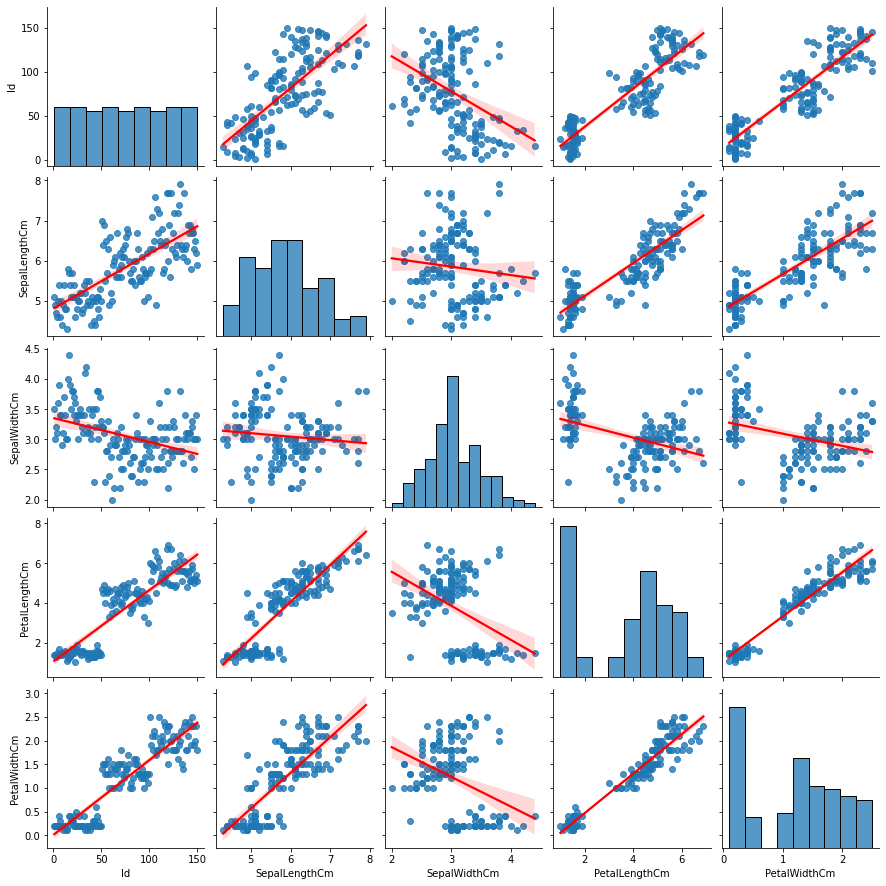

In [18]:
#seaborn pair-plot with red linear regression line
sns.pairplot(df, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()

The more spred out the data points are, the less correlation and pattern that can be extrapolated. The closer the datapoints are going in a straight-line, then more correlation and better pattern that can be extrapolated. 

Which One is better?

The instructions for Model 1 and 2 were a little confusing to read and understand; but I found that when i placed x as PetalLengthcm and y as SepalLengthCm, mean-squared error was 0.404167, which makes Model 2 the best model so far. This is dependent on which columns are chosen for both values x and y. Sepalwidth and Sepal Length as x and y lead to a much less accurate model as in model 1, as you can see in the plots of model 1 & 2 test/training sets. The other independent variables got higher mse score around 0.6.

If the data points are all over the place such as in the plots for model 1 and 2, then the mse score is going to be higher because there is no real pattern within the data for the machine learing model to learn from and predict so, but on the otherhand if there